In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from scipy import stats

# Get Stocks Data

In [ ]:
def get_stocks(kode, start_date, end_date):
  stocks = yf.Ticker(kode)
  historical_data = stocks.history(start=start_date, end=end_date)
  return historical_data

kode = "INDF.JK"
start_date = '2023-12-18'
end_date = '2024-12-18'
df = get_stocks(kode, start_date, end_date)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-18 00:00:00+07:00,6052.616793,6100.463566,5980.846633,6004.770020,14586700,0.0,0.0
2023-12-19 00:00:00+07:00,6004.769927,6076.540085,5980.846541,6052.616699,2670000,0.0,0.0
2023-12-20 00:00:00+07:00,6052.616793,6076.540179,6004.770020,6004.770020,5902400,0.0,0.0
2023-12-21 00:00:00+07:00,6028.693406,6052.616793,5980.846633,6004.770020,5786000,0.0,0.0
2023-12-22 00:00:00+07:00,6028.693406,6076.540179,6004.770020,6004.770020,6712600,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-11 00:00:00+07:00,8075.000000,8300.000000,8075.000000,8200.000000,12998600,0.0,0.0
2024-12-12 00:00:00+07:00,8200.000000,8200.000000,8025.000000,8200.000000,8878600,0.0,0.0
2024-12-13 00:00:00+07:00,8200.000000,8275.000000,8075.000000,8175.000000,7183300,0.0,0.0


# Stocks Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2023-12-18 00:00:00+07:00 to 2024-12-17 00:00:00+07:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          238 non-null    float64
 1   High          238 non-null    float64
 2   Low           238 non-null    float64
 3   Close         238 non-null    float64
 4   Volume        238 non-null    int64  
 5   Dividends     238 non-null    float64
 6   Stock Splits  238 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 14.9 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,238.000000,238.000000,238.000000,238.000000,2.380000e+02,238.000000,238.0
mean,6504.331234,6559.798891,6440.517024,6508.444968,9.490578e+06,1.121849,0.0
std,685.875832,698.887492,673.758197,694.277500,5.215281e+06,17.307039,0.0
min,5645.919155,5693.766161,5598.072612,5621.996094,2.090500e+06,0.000000,0.0
25%,6004.769893,6058.212594,5950.000000,6001.192505,5.768225e+06,0.000000,0.0
50%,6172.233910,6220.080661,6124.387136,6172.233887,8.349250e+06,0.000000,0.0
75%,7050.000000,7143.750000,6993.750000,7050.000000,1.148282e+07,0.000000,0.0
max,8200.000000,8300.000000,8075.000000,8200.000000,3.109940e+07,267.000000,0.0


In [ ]:
print(f"Tanggal awal: {df.index[0]}")
print(f"Tanggal akhir: {df.index[-1]}")
print(f"Harga awal: {df['Close'].iloc[0]:.2f}")
print(f"Harga akhir: {df['Close'].iloc[-1]:.2f}")

Tanggal awal: 2023-12-18 00:00:00+07:00
Tanggal akhir: 2024-12-17 00:00:00+07:00
Harga awal: 6004.77
Harga akhir: 8050.00


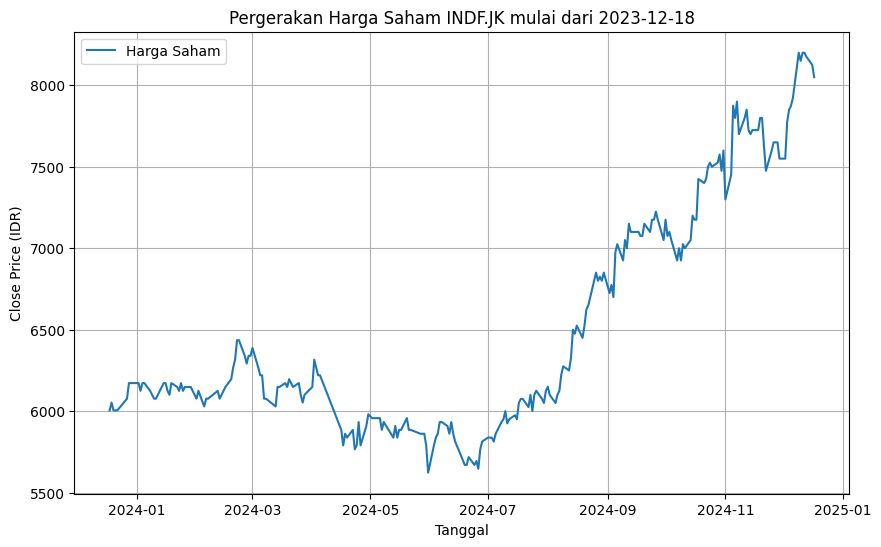

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Harga Saham')
plt.title(f'Pergerakan Harga Saham {kode} mulai dari {df.index[0].strftime("%Y-%m-%d")}')
plt.xlabel('Tanggal')
plt.ylabel('Close Price (IDR)')  # Atau USD tergantung mata uang yang digunakan
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data = df.drop(columns=['Dividends', 'Stock Splits'], errors='ignore').dropna()
data

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-18 00:00:00+07:00,6052.616793,6100.463566,5980.846633,6004.770020,14586700
2023-12-19 00:00:00+07:00,6004.769927,6076.540085,5980.846541,6052.616699,2670000
2023-12-20 00:00:00+07:00,6052.616793,6076.540179,6004.770020,6004.770020,5902400
2023-12-21 00:00:00+07:00,6028.693406,6052.616793,5980.846633,6004.770020,5786000
2023-12-22 00:00:00+07:00,6028.693406,6076.540179,6004.770020,6004.770020,6712600
...,...,...,...,...,...
2024-12-11 00:00:00+07:00,8075.000000,8300.000000,8075.000000,8200.000000,12998600
2024-12-12 00:00:00+07:00,8200.000000,8200.000000,8025.000000,8200.000000,8878600
2024-12-13 00:00:00+07:00,8200.000000,8275.000000,8075.000000,8175.000000,7183300


In [ ]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


# Simulate Stocks Data

## Log Returns

In [ ]:
data['Close'] = data['Close'].replace(0,0.1)

In [ ]:
data['log_returns'] = np.log(data['Close'] / data['Close'].shift(1))

In [ ]:
data = data.dropna(subset=['log_returns'])

In [ ]:
data

,Open,High,Low,Close,Volume,log_returns
Date,,,,,,
2023-12-19 00:00:00+07:00,6004.769927,6076.540085,5980.846541,6052.616699,2670000,0.007937
2023-12-20 00:00:00+07:00,6052.616793,6076.540179,6004.770020,6004.770020,5902400,-0.007937
2023-12-21 00:00:00+07:00,6028.693406,6052.616793,5980.846633,6004.770020,5786000,0.000000
2023-12-22 00:00:00+07:00,6028.693406,6076.540179,6004.770020,6004.770020,6712600,0.000000
2023-12-27 00:00:00+07:00,6004.769881,6124.386811,6004.769881,6076.540039,3536000,0.011881
...,...,...,...,...,...,...
2024-12-11 00:00:00+07:00,8075.000000,8300.000000,8075.000000,8200.000000,12998600,0.006116
2024-12-12 00:00:00+07:00,8200.000000,8200.000000,8025.000000,8200.000000,8878600,0.000000
2024-12-13 00:00:00+07:00,8200.000000,8275.000000,8075.000000,8175.000000,7183300,-0.003053


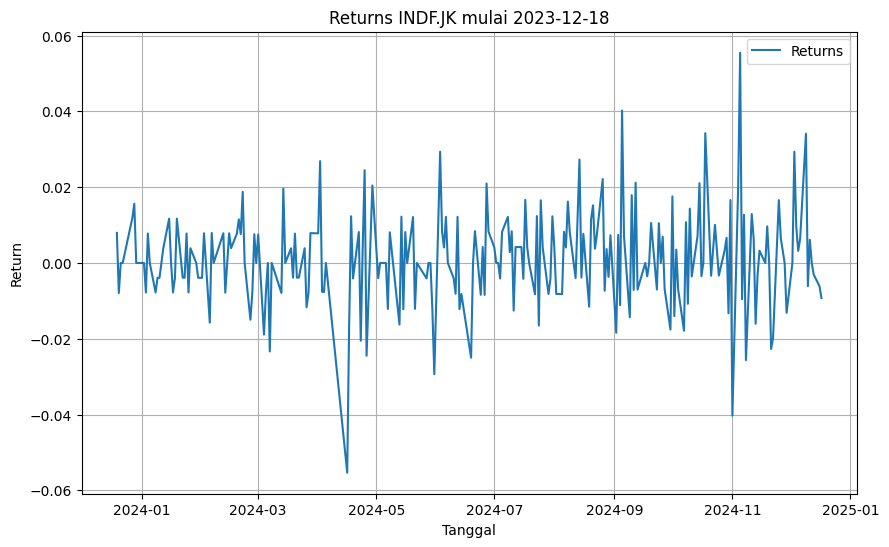

In [ ]:
# Plot the log returns
plt.figure(figsize=(10, 6))
plt.plot(data['log_returns'], label='Returns')
plt.title(f'Returns {kode} mulai {start_date}')
plt.xlabel('Tanggal')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

## Calc the Volatility

In [ ]:
def volatility_calc(lr):
    daily_volatility = np.std(lr)
    return daily_volatility

In [ ]:
# Test
volatility = data['log_returns']
print(volatility_calc(volatility))

0.012771534057135499


## Normality Test

In [ ]:
## uji kolmogorov
stat, p_value = stats.kstest(data['log_returns'], 'norm')
print("Kolmogorov-Smirnov Test:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Kolmogorov-Smirnov Test:
Statistic: 0.4799
P-value: 0.0000


## Calc the Parameters

In [ ]:
def hitung_parameter_model(return_data):
    # Ekspektasi return
    ekspektasi = np.mean(return_data)

    # Variansi
    variansi = np.var(return_data)

    # Volatilitas (sesuai rumus pada jurnal)
    n = len(return_data)
    volatilitas = np.sqrt((np.sum((return_data - ekspektasi)**2)) / (n - 1))

    return ekspektasi, variansi, volatilitas

# Hitung parameter
mu, sigma_squared, sigma = hitung_parameter_model(data['log_returns'])
print(f"Ekspektasi return (μ): {mu:.6f}")
print(f"Variansi (σ²): {sigma_squared:.6f}")
print(f"Volatilitas (σ): {sigma:.6f}")

Ekspektasi return (μ): 0.001237
Variansi (σ²): 0.000163
Volatilitas (σ): 0.012799


# Monte-Carlo Simulation

In [ ]:
def run_monteCarlo(num_simulations, num_days, last_price, volatility):
    # Inisialisasi list untuk menyimpan hasil simulasi
    all_simulations = []

    for x in range(num_simulations):
        price_series = [last_price]

        for y in range(1, num_days):
            price = price_series[-1] * (1 + np.random.normal(0, volatility))
            price_series.append(price)

        all_simulations.append(price_series)

    # Konversi list simulasi menjadi DataFrame dengan header jelas
    simulation_df = pd.DataFrame(
        np.transpose(all_simulations), # Transpose all_simulations

    )
    simulation_df.columns = [f"Simulation {i+1}" for i in range(num_simulations)] # Set column headers

    return simulation_df

num_simulations = 100
num_days = 256

# Get the closing price for the last day of the stock data
last_price = data['Close'].iloc[-1]

# Calculate the volatility
volatility = volatility_calc(data['log_returns'])

simulation_df = run_monteCarlo(num_simulations, num_days, last_price, volatility)

In [ ]:
# Test
simulation_df = run_monteCarlo(num_simulations , num_days , last_price , volatility)

simulation_df

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 91,Simulation 92,Simulation 93,Simulation 94,Simulation 95,Simulation 96,Simulation 97,Simulation 98,Simulation 99,Simulation 100
0,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,...,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000
1,8093.527080,7855.389569,7922.418089,8155.284589,7975.075553,7991.404803,7917.543361,7958.789311,8183.804732,8366.555135,...,7975.672895,8092.433283,7988.654486,7966.380323,8030.990954,7947.289370,8099.799748,7917.042668,8138.311460,7931.539749
2,8008.732116,7813.719988,7923.623553,8065.622689,7975.226806,7872.848620,7785.775342,7987.954751,8140.071088,8482.107154,...,7905.866325,8056.638083,7916.471680,8201.469368,7982.257232,7847.396072,7997.746608,7990.444142,8131.262550,7912.055466
3,7931.716532,7753.744808,7929.350734,8195.915106,7916.245414,7815.525587,7755.002193,8188.673815,8340.030800,8667.405051,...,7901.726713,8155.092781,8045.930105,8176.707094,8029.903913,7841.678448,8073.998315,7892.206461,8194.480613,7943.791126
4,7909.831289,7707.091821,7860.571496,8344.903034,8172.920003,8059.575051,7756.525352,8006.189415,8213.808020,8315.182433,...,7901.904278,8114.326930,7961.632293,8205.993224,7930.747844,7960.243630,7969.129899,7998.989358,8305.396332,8046.642787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,5951.859705,6932.704018,7890.948198,8102.274966,5910.235778,8574.842690,7592.793724,7798.755587,7109.975478,9361.000096,...,5864.468246,7122.552382,8352.159957,10249.407734,6429.172836,8302.534381,8423.560177,8109.246451,7525.599051,7715.417487
252,5959.740615,6989.094605,7913.755602,8244.601492,5958.691776,8616.540400,7545.253849,7784.518034,7057.524313,9307.761016,...,5892.513776,6968.977878,8394.555245,10262.330754,6264.457606,8147.738824,8199.965278,8221.209445,7454.330416,7791.945206
253,5927.011819,7057.295367,7897.304960,8232.178471,6022.833989,8556.119201,7703.969363,7767.119850,7107.211450,9228.029486,...,6010.013370,6956.052814,8574.625771,10387.979074,6348.282011,8165.902158,8053.955473,8174.778587,7476.091310,7824.593896
254,5878.744997,7114.756850,7786.865757,8249.962547,6000.288624,8446.835265,7706.281205,7977.908996,7026.017431,9160.645039,...,6005.982741,6934.637577,8531.033741,10508.994026,6410.263793,8273.144658,7991.493367,8153.597239,7490.547991,7861.427097


Text(0, 0.5, 'Price')

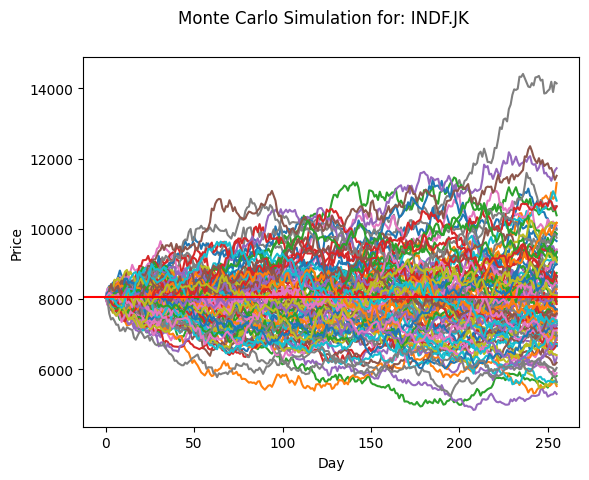

In [ ]:
simulation_df.plot(legend=False)
plt.suptitle(f'Monte Carlo Simulation for: {kode}') # Changed 'ticker' to 'kode'
plt.axhline(y = last_price, color = 'r', linestyle= '-')
plt.xlabel('Day')
plt.ylabel('Price')

In [ ]:
def hitung_mape(data, hasil_simulasi, simulation_index=-1):
    """
    Menghitung MAPE antara data aktual dan hasil simulasi tertentu.
    """
    # Get the number of days from the simulation
    num_days = hasil_simulasi.shape[0]

    # Get the actual prices, slicing the data to match simulation length
    # Use .iloc to index by integer position
    # Ensure we use the smaller of num_days or the length of the data to avoid shape errors
    num_days_actual = min(num_days, len(data))
    harga_aktual = data['Close'].iloc[-num_days_actual:].values

    # Get the predicted values from the specified simulation column
    # Make sure to slice the prediction to match the shape of actual values
    prediksi = hasil_simulasi.iloc[:num_days_actual, simulation_index].values

    # Calculate MAPE
    mape = np.mean(np.abs((harga_aktual - prediksi) / harga_aktual)) * 100

    # Create DataFrame for comparison
    comparison = pd.DataFrame({
        'Harga Aktual': harga_aktual,
        'Prediksi': prediksi,
        'APE (%)': np.abs((harga_aktual - prediksi) / harga_aktual) * 100
    })

    return comparison, mape

# Get the closing price for the last day of the stock data
last_price = data['Close'].iloc[-1]

# Calculate the volatility
volatility = volatility_calc(data['log_returns'])

# Run Monte Carlo simulation
hasil_simulasi = run_monteCarlo(num_simulations, num_days, last_price, volatility) # Pass the calculated volatility

# Calculate MAPE using the last simulation
comparison, mape = hitung_mape(data, hasil_simulasi)

# Display comparison results and MAPE
print("\nTabel Perbandingan Harga Saham dan Simulasi Monte Carlo")
print(comparison.round(2))
print(f"\nMAPE: {mape:.2f}%")


Tabel Perbandingan Harga Saham dan Simulasi Monte Carlo
     Harga Aktual  Prediksi  APE (%)
0         6052.62   8050.00    33.00
1         6004.77   7988.87    33.04
2         6004.77   8096.04    34.83
3         6004.77   8158.32    35.86
4         6076.54   8100.01    33.30
..            ...       ...      ...
232       8200.00   7926.94     3.33
233       8200.00   7833.01     4.48
234       8175.00   7832.01     4.20
235       8125.00   7682.31     5.45
236       8050.00   7718.81     4.11

[237 rows x 3 columns]

MAPE: 16.27%


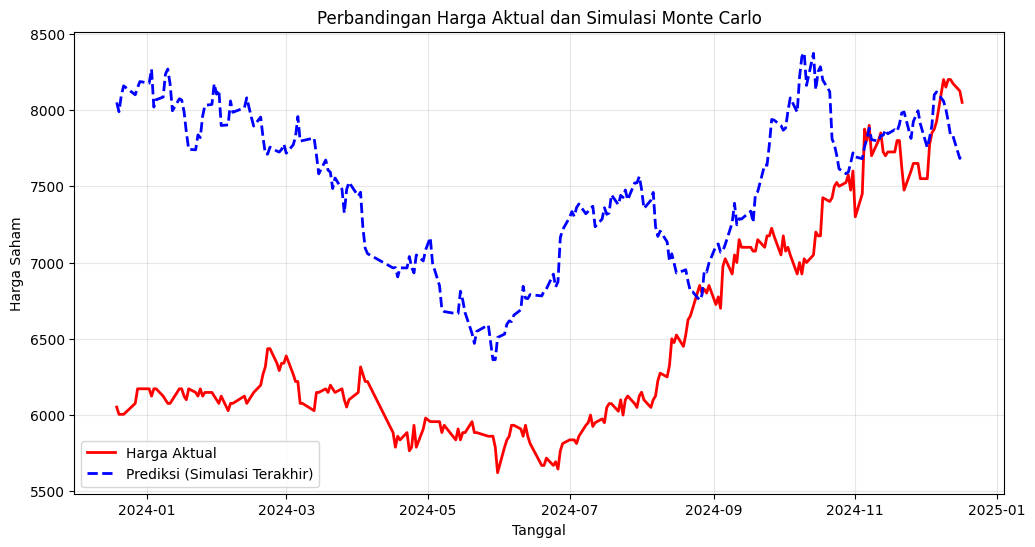

In [ ]:
# Plot hasil simulasi dan harga aktual
plt.figure(figsize=(12, 6))
num_days_actual = min(num_days, len(data)) # Get the minimum number of days
plt.plot(data.index[-num_days_actual:], data['Close'].values[-num_days_actual:], 'r-', label='Harga Aktual', linewidth=2) # Slice data.index and data['Close']
plt.plot(data.index[-num_days_actual:], hasil_simulasi.iloc[:num_days_actual, -1], 'b--', label='Prediksi (Simulasi Terakhir)', linewidth=2) # Slice the simulation data
plt.title('Perbandingan Harga Aktual dan Simulasi Monte Carlo')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Kolmogorov-Smirnov Test Results:
KS Statistic: 0.4838
P-value: 0.0000


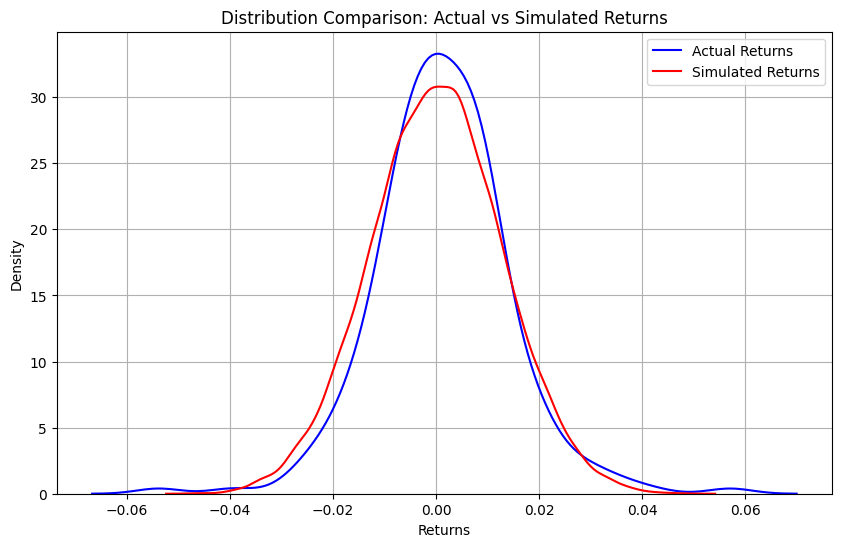

In [ ]:
simulated_returns = simulation_df.pct_change().dropna().values.flatten()
# Convert real returns to 1D array
real_returns = data['Close'].pct_change().dropna().values.flatten()

# Perform KS test
# The function perform_ks_test is not defined, so this should be removed
# ks_statistic, p_value = perform_ks_test(real_returns, simulated_returns)

# Instead use the stats.kstest function as used before

ks_statistic, p_value = stats.kstest(simulated_returns, 'norm')

print("\nKolmogorov-Smirnov Test Results:")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot distribution comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(data=real_returns, label='Actual Returns', color='blue')
sns.kdeplot(data=simulated_returns, label='Simulated Returns', color='red')
plt.title('Distribution Comparison: Actual vs Simulated Returns')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()